In [289]:
#Importing Libraries

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [291]:
#Creating Database Connection

username = "root"
password = "Priyapriya@11"
encoded_password = quote_plus(password)
host = "localhost"
port = "3306"
database = "e_master_card"
engine = create_engine(f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}/{database}")


In [293]:
#Read tables into  DataFrames

#Customer Table
df_customers = pd.read_sql("SELECT * FROM customers;", engine)
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


In [295]:
#Transaction Table
df_transactions = pd.read_sql("SELECT * FROM transactions;", engine)
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [296]:
#Credit Profiles Table
df_credit_profiles = pd.read_sql("SELECT * FROM credit_profiles;", engine)
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


<h1>EXPLORE CUSTOMER TABLE</h1>

In [298]:
#Data Cleaning

df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


**Inference:**
- The dataset contains 1,000 customers.
- The average customer age is 36 years.
- The average annual income of customers is 139,410.
- Outliers are present in both variables:
   1. Age: Minimum = 1, Maximum = 135   |    2. Annual Income: Minimum = 2

In [300]:
#Checking for duplicate values

df_customers[df_customers['cust_id'].duplicated()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [301]:
df_customers.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

**Inference:**
- No duplicate values in cust_id column.
- Annual income column has 50 null values

In [303]:
#Replacing null values and outliers

df_customers['annual_income'].isnull().sum()  #50
df_customers[df_customers['annual_income'].isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married
155,156,Krishna Trivedi,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Kulkarni,Male,52,City,Business Owner,NaN,Single
186,187,Aanya Pande,Male,53,City,Consultant,NaN,Single
192,193,Mira Naidu,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Mihika Batra,Male,48,City,Business Owner,NaN,Married
232,233,Aaditya Rathore,Male,26,City,Freelancer,NaN,Married


In [304]:
#Calculating occupation-wise median

df_occupation_median = df_customers.groupby('occupation')['annual_income'].median()
df_occupation_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [305]:
df_customers["annual_income"] = df_customers["annual_income"].fillna(df_customers["occupation"].map(df_occupation_median))
df_customers.iloc[[14,82,995,998]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,45794.0,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,46759.0,Single
995,996,Advait Rana,Female,26,City,Freelancer,46759.0,Married
998,999,Aanya Malhotra,Female,47,City,Business Owner,261191.5,Married


**Inference:**
- Null values were replaced using the median value grouped by occupation.

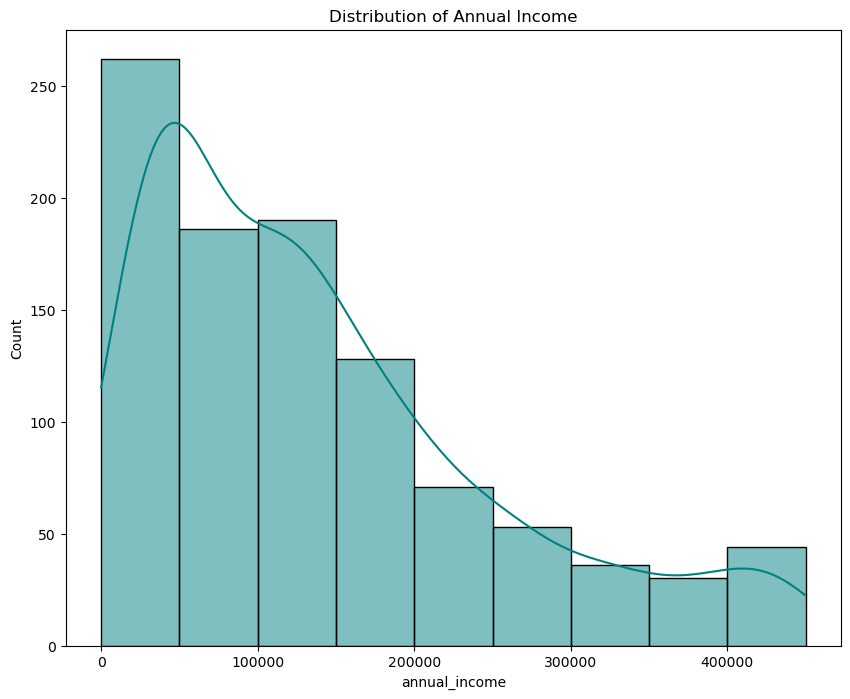

In [307]:
#Distribution of Annual Income

plt.figure(figsize=(10,8))
bins = np.arange(0, df_customers['annual_income'].max() + 50000, 50000)
sns.histplot(df_customers["annual_income"],kde=True,color="Teal",bins=bins)
plt.title("Distribution of Annual Income")
plt.show()

**Inference:**
- The annual income distribution is right-skewed, indicating that most customers fall into the low-to-mid income range.
- A high concentration of customers is observed below USD 150000, suggesting this is the dominant income segment.
- A long right tail is present, showing a smaller number of customers with very high incomes (extending beyond USD 400000).
- These high-income values indicate the presence of outliers, which may influence the mean and should be handled for further analysis.

In [309]:
#Treating Outliers - Income must be >100 

df_customers[df_customers["annual_income"]<100]  

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,50.0,Married
262,263,Veer Rathod,Male,53,Suburb,Business Owner,50.0,Married
316,317,Avinash Chauhan,Male,47,City,Consultant,50.0,Married
333,334,Samaira D'Souza,Female,29,City,Data Scientist,50.0,Married
340,341,Ridhi Rastogi,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Gauri Gupta,Male,54,City,Consultant,2.0,Married
592,593,Vivaan Pande,Female,32,City,Business Owner,50.0,Married
633,634,Aradhya Pandey,Male,26,City,Data Scientist,2.0,Married
686,687,Gauri Nanda,Male,40,City,Business Owner,2.0,Married
696,697,Avani Lalwani,Male,47,City,Consultant,20.0,Married


In [310]:
for index,row in df_customers.iterrows():
    if row['annual_income']<100:
        df_customers.at[index,'annual_income']=df_occupation_median[row['occupation']]

In [311]:
df_customers[df_customers["annual_income"]<100] 

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


**Inference:**
- Annual income values below 100 were replaced using the occupation-wise median, resulting in no remaining values under 100.

In [313]:
#Chekcing null values

df_customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

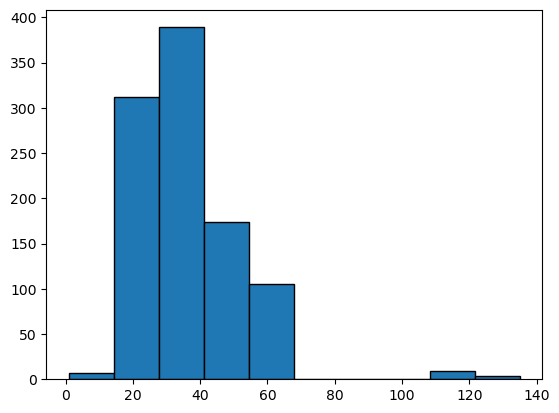

In [314]:
#Checking Outliers

plt.hist(df_customers['age'],bins=10,edgecolor='black')
plt.show()

**Inference:**
- Outliers are present for ages above 120 years, indicating unrealistic values.

In [316]:
#Treating Outliers

age_outliers = df_customers[(df_customers['age']<15) | (df_customers['age']>80)]
age_outliers 

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,110,City,Artist,7621.0,Married
165,166,Swara Mehtani,Female,1,City,Freelancer,39721.0,Single
174,175,Sneha Jaiswal,Male,110,City,Freelancer,23723.0,Married
222,223,Aaryan Bajaj,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Amaira Dewan,Male,110,City,Consultant,96522.0,Single
295,296,Veer Anand,Male,1,Rural,Accountant,55254.0,Married
325,326,Yash Chatterjee,Male,110,City,Accountant,61021.0,Single
610,611,Advait Mangal,Male,135,Rural,Business Owner,444776.0,Married
692,693,Aarohi Dubey,Male,1,City,Business Owner,83045.0,Married


In [317]:
df_age_median = df_customers.groupby('occupation')['age'].median()
df_age_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [318]:
for index,row in age_outliers.iterrows():
    df_customers.at[index,'age']=df_age_median[row['occupation']]

In [319]:
df_customers.iloc[[0,41,951,991]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,26.0,City,Artist,7621.0,Married
951,952,Ishan Khanna,Male,32.0,City,Data Scientist,49677.0,Married
991,992,Krishna Banerjee,Male,27.5,City,Fullstack Developer,93267.0,Single


In [320]:
df_customers[(df_customers['age']<15) | (df_customers['age']>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


**Inference:**
- The ouliers were replaced with age-wise median.
- No records remain with age below 15 or above 80.

In [322]:
#Catgeorize age group

bins=17,25,48,65
labels=['18-25','26-48','49-65']

df_customers['age_category'] = pd.cut(df_customers['age'],bins=bins,labels=labels)
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_category
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48


In [323]:
age_category_count = df_customers['age_category'].value_counts(normalize=True)*100
age_category_count

age_category
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

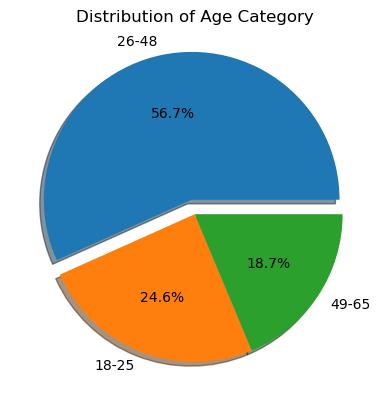

In [324]:
plt.pie(age_category_count,labels=age_category_count.index,shadow=True, autopct='%1.1f%%',explode=(0.1,0,0))
plt.title("Distribution of Age Category")
plt.show()

**Inference:**
- Nearly 56% of customers fall within the 26–48 age group, making it the largest customer segment.
- Young adults and middle-aged customers (18–25 years) account for 24%, followed by senior customers (49–65 years) at 18%

In [326]:
#Customer Distrubtion by Location and Gender

cust_distrubtion=df_customers.groupby(['location','gender']).size()
cust_distrubtion=cust_distrubtion.unstack()
cust_distrubtion

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


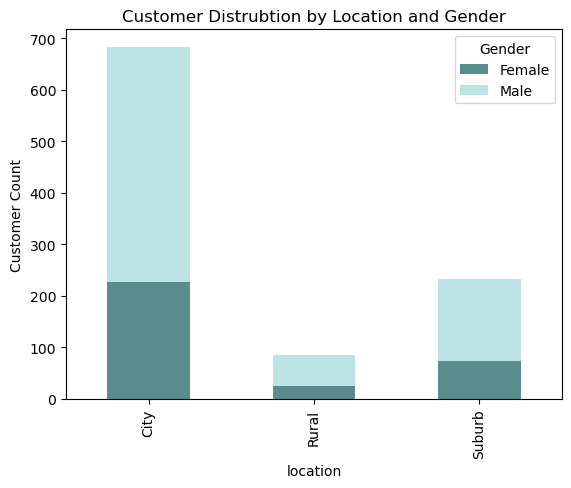

In [327]:
cust_distrubtion.plot(kind="bar",stacked=True,color=["#598D8D","#BCE3E3"])
plt.title("Customer Distrubtion by Location and Gender")
plt.ylabel("Customer Count")
plt.legend(title="Gender")
plt.show()

**Inference:**

- The City location has the highest customer concentration, significantly outperforming Suburban and Rural areas.
- Across all locations, the male customer count is higher than female customer count.
- Suburban areas show a moderate customer presence, with a noticeable gap between male and female customers.
- Rural locations have the lowest customer count, suggesting lower engagement in these areas.

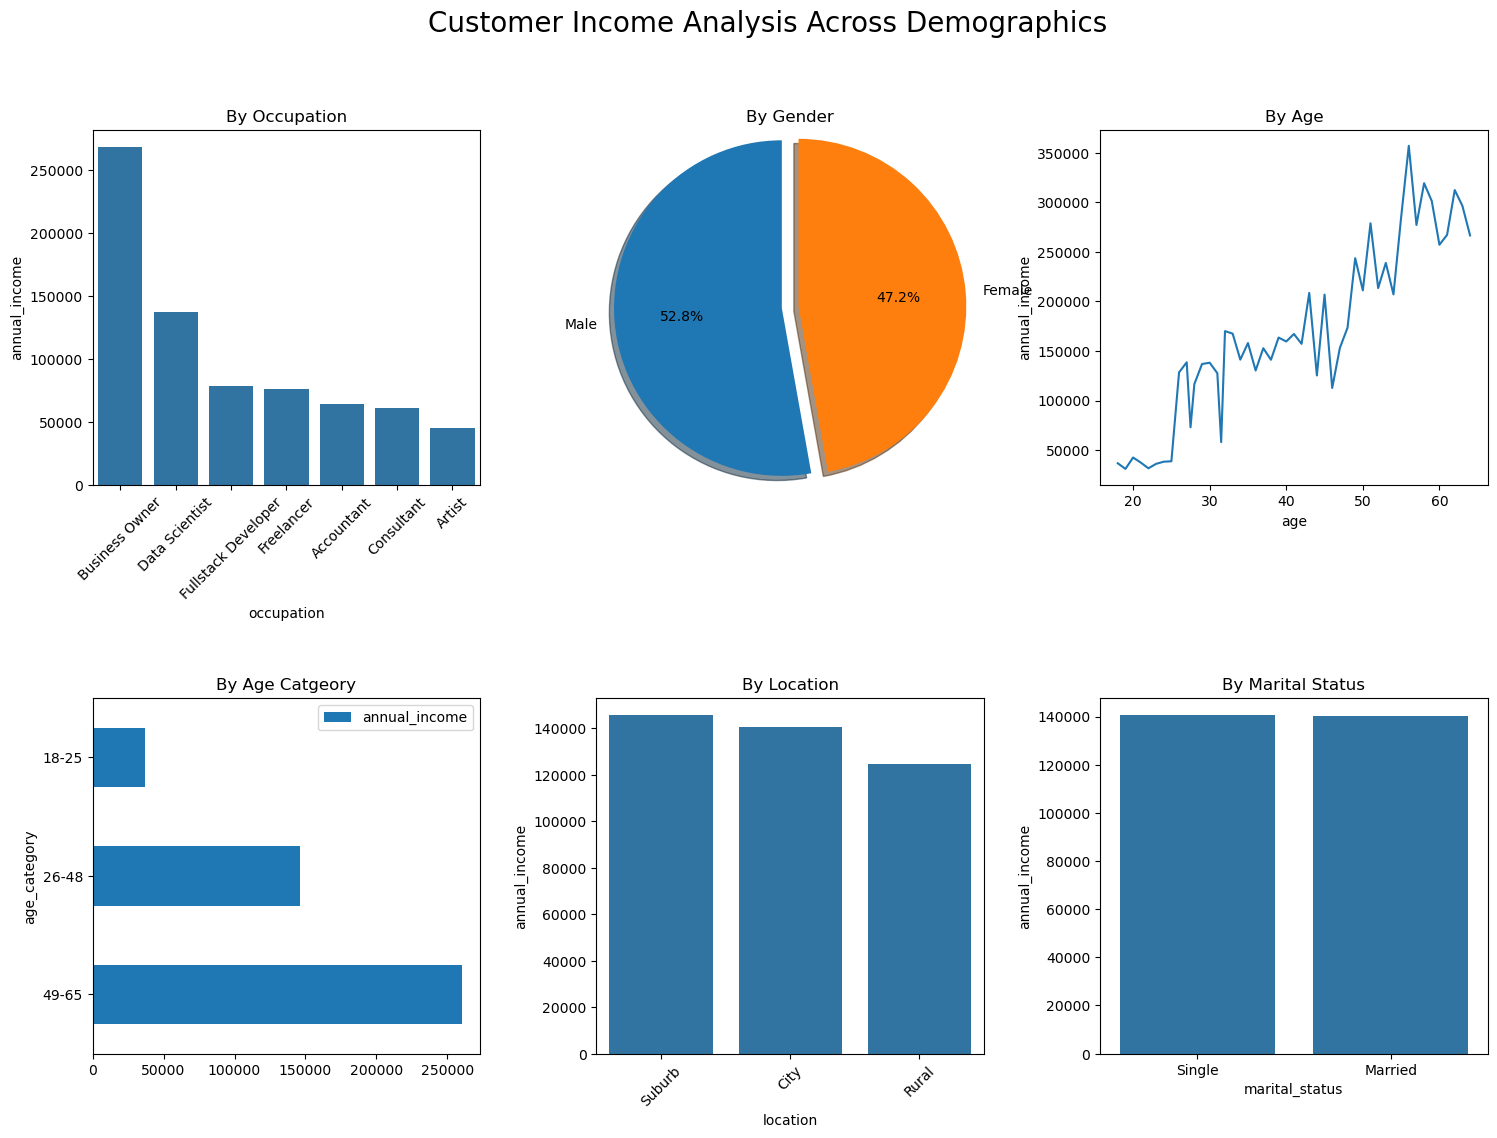

In [337]:
#Average Annual Income Based on Occupation,Gender,Age, Location, Marital Status,Age Category

df_occupation_mean = round(df_customers.groupby('occupation')['annual_income'].mean().sort_values(ascending=False).reset_index(),2)
df_gender_mean = round(df_customers.groupby('gender')['annual_income'].mean().sort_values(ascending=False).reset_index(),2)
df_age_mean = round(df_customers.groupby('age')['annual_income'].mean().sort_values(ascending=False).reset_index(),2)
df_location_mean = round(df_customers.groupby('location')['annual_income'].mean().sort_values(ascending=False).reset_index(),2)
df_maritalstatus_mean = round(df_customers.groupby('marital_status')['annual_income'].mean().sort_values(ascending=False).reset_index(),2)
df_agecategory_mean = round(df_customers.groupby('age_category')['annual_income'].mean().sort_values(ascending=False).reset_index(),2)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Customer Income Analysis Across Demographics", fontsize=20,y=0.98)
fig.subplots_adjust(top=0.88, hspace=0.6,wspace=0.3)

sns.barplot(data=df_occupation_mean,x='occupation',y='annual_income',ax=axes[0, 0])
axes[0, 0].set_title("By Occupation")
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].pie(df_gender_mean['annual_income'],labels=df_gender_mean['gender'],explode=(0,0.1),autopct='%1.1f%%',startangle=90,shadow=True,)
axes[0, 1].set_title("By Gender")
axes[0, 1].axis('equal')

sns.lineplot(data=df_age_mean,x='age',y='annual_income',ax=axes[0, 2])
axes[0, 2].set_title("By Age")

df_agecategory_mean.plot.barh(x='age_category',y='annual_income',ax=axes[1, 0])
axes[1, 0].set_title("By Age Catgeory")
    
sns.barplot(data=df_location_mean,x='location',y='annual_income',ax=axes[1, 1])
axes[1, 1].set_title("By Location")
axes[1, 1].tick_params(axis='x', rotation=45)

sns.barplot(data=df_maritalstatus_mean,x='marital_status',y='annual_income',ax=axes[1, 2])
axes[1, 2].set_title("By Marital Status")

plt.show()

**Inference:**
- Occupation-wise, business owners earn the highest average annual income, followed by data scientists and full-stack developers, indicating strong income potential in entrepreneurial and tech-driven roles.
- Gender-wise, male customers have a slightly higher average annual income compared to female customers, though the distribution remains relatively balanced.
- Age-wise, annual income shows a clear upward trend with age, peaking in the 49–65 age group, suggesting income growth with experience and career maturity.
- Age category analysis further supports this pattern, with the 49–65 group earning the highest average income, followed by 26–48, while 18–25 earns the least.
- Location-wise, customers from urban (city) areas have higher average incomes than suburban and rural customers, highlighting the income advantage associated with city-based employment opportunities.
- Marital status shows minimal variation in average income, indicating that income levels are largely independent of marital status in this dataset.

<h1>EXPLORE CREDIT PROFILE TABLE</h1>

In [357]:
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [358]:
df_credit_profiles.shape

(1004, 6)

In [361]:
#Checking for duplicate values

df_credit_profiles[df_credit_profiles['cust_id'].duplicated(keep=False)]
df_credit_profiles = df_credit_profiles.drop_duplicates(subset=['cust_id'],keep="last")
df_credit_profiles.shape

(1000, 6)

**Inference:**

- Duplicate records with missing information were removed, retaining the second occurrence.
  

In [364]:
#Checking for null values

df_credit_profiles.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [366]:
df_credit_profiles[df_credit_profiles['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [368]:
df_credit_profiles['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

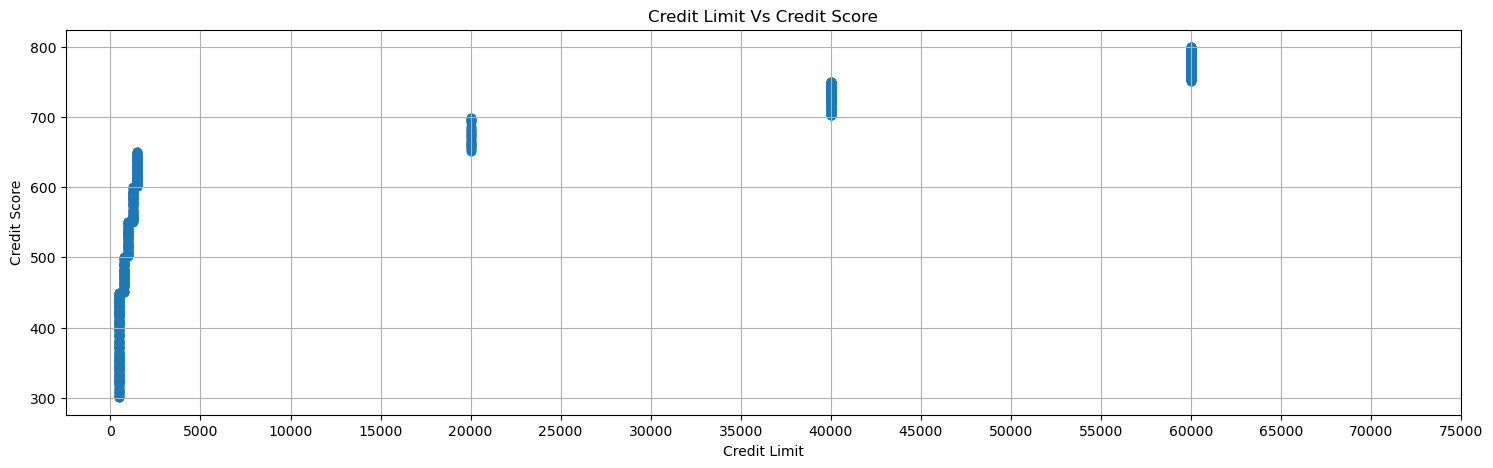

In [370]:
#Understanding the corelationship between credit limit and credit score

plt.figure(figsize=(18,5))
plt.scatter(df_credit_profiles['credit_limit'],df_credit_profiles['credit_score'])
plt.title("Credit Limit Vs Credit Score")
plt.xlabel('Credit Limit')
plt.xticks(range(0,80000,5000))
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

In [372]:
#Categorizing credit score range

df_credit_profiles['credit_score'].max()  #799
df_credit_profiles['credit_score'].min()  #300
bins = list(range(300, 850, 50))
bins_label = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_credit_profiles['credit_score_range'] = pd.cut(df_credit_profiles['credit_score'],bins=bins,labels=bins_label,include_lowest=True)
df_credit_profiles

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-750
1,2,587,0.107928,161644.0,2.0,1250.0,550-600
2,3,544,0.854807,513.0,4.0,1000.0,500-550
3,4,504,0.336938,224.0,2.0,1000.0,500-550
4,5,708,0.586151,18090.0,2.0,40000.0,700-750
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-600
1000,997,774,0.465462,17139.0,0.0,60000.0,750-800
1001,998,529,0.585856,386.0,3.0,1000.0,500-550
1002,999,725,0.249670,6973.0,2.0,40000.0,700-750


In [374]:
#Adding mode value for missing null values in credit limit column using the credit_score_range
df_mode = df_credit_profiles.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
df_mode

,credit_score_range,credit_limit
0,300-350,500.0
1,350-400,500.0
2,400-450,500.0
3,450-500,750.0
4,500-550,1000.0
5,550-600,1250.0
6,600-650,1500.0
7,650-700,20000.0
8,700-750,40000.0
9,750-800,60000.0


In [376]:
new_df_credit_profile = pd.merge(df_credit_profiles,df_mode,on="credit_score_range",suffixes=("","_mode"))
new_df_credit_profile.sample(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
404,405,340,0.584373,166.0,1.0,500.0,300-350,500.0
790,791,617,0.739044,768.0,3.0,1500.0,600-650,1500.0
830,831,743,0.761073,18294.0,0.0,40000.0,700-750,40000.0
111,112,444,0.285421,124.0,0.0,500.0,400-450,500.0
526,527,469,0.545997,221.0,4.0,750.0,450-500,750.0


In [378]:
new_df_credit_profile['credit_limit'].fillna(new_df_credit_profile['credit_limit_mode'],inplace=True)
new_df_credit_profile.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

**Inference:**

- 65 missing values in the `credit_limit` column were imputed using the modal credit limit within each corresponding credit score range.
- No missing values.


In [381]:
new_df_credit_profile.shape

(1000, 8)

In [383]:
#Checking for Outliers

new_df_credit_profile.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


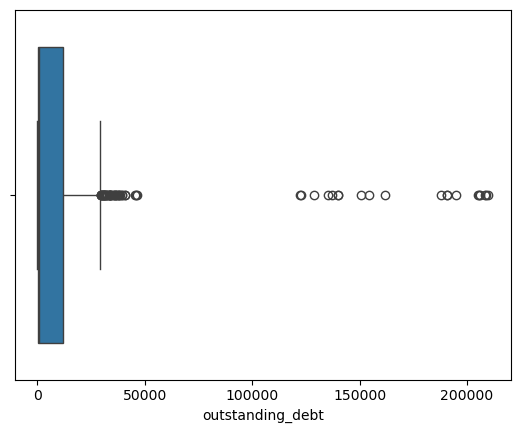

In [385]:
sns.boxplot(x=new_df_credit_profile['outstanding_debt'])
plt.show()

**Inference:**
  
- The `outstanding_debt` variable contains several extreme high-value outliers, indicating a small subset of customers with unusually large debt amounts.
  

In [388]:
new_df_credit_profile[new_df_credit_profile['outstanding_debt']>new_df_credit_profile['credit_limit']].shape

(20, 8)

In [390]:
#Outstanding debt can't be greater than credit limit

new_df_credit_profile.loc[new_df_credit_profile['outstanding_debt']>new_df_credit_profile['credit_limit'],'outstanding_debt'] = new_df_credit_profile['credit_limit']
new_df_credit_profile[new_df_credit_profile['outstanding_debt']>new_df_credit_profile['credit_limit']].shape

(0, 8)

**Inference:**

- Outstanding debt outliers were replaced with the corresponding credit limit, as outstanding debt cannot exceed the assigned credit limit.
- No outliers remain after this treatment.

In [393]:
#Bivariate Analysis on Credit Profile Variables

df_merged = pd.merge(df_customers,new_df_credit_profile, on="cust_id", how="inner")
df_merged

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_category,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-750,40000.0
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-600,1250.0
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-550,1000.0
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-550,1000.0
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-750,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Advait Rana,Female,26.0,City,Freelancer,46759.0,Married,26-48,564,0.702963,688.0,2.0,1250.0,550-600,1250.0
996,997,Sia Chatterjee,Male,55.0,City,Business Owner,290061.0,Single,49-65,774,0.465462,17139.0,0.0,60000.0,750-800,60000.0
997,998,Amara Tiwari,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48,529,0.585856,386.0,3.0,1000.0,500-550,1000.0
998,999,Aanya Malhotra,Female,47.0,City,Business Owner,261191.5,Married,26-48,725,0.249670,6973.0,2.0,40000.0,700-750,40000.0


In [395]:
columns=['credit_score','credit_utilisation','outstanding_debt', 'credit_limit','annual_income','age']
corr_matrix=df_merged[columns].corr()

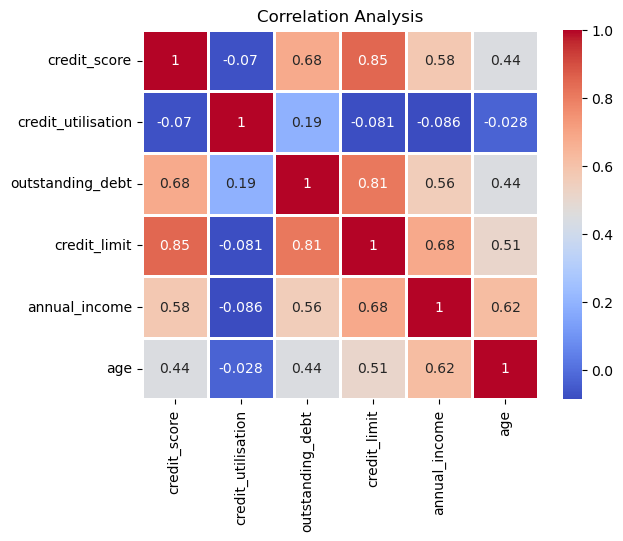

In [397]:
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,linewidth=0.8)
plt.title('Correlation Analysis')
plt.show()

**Inference:**

- Credit score shows a strong positive correlation with credit limit (0.85) and outstanding debt (0.68), indicating that higher credit scores are associated with higher borrowing capacity.
- Outstanding debt is strongly correlated with credit limit (0.81), suggesting that customers with higher limits tend to carry higher balances.
- Annual income has a moderate positive correlation with credit limit (0.68) and age (0.62), implying income tends to increase with age and influences credit capacity.
- Credit utilisation exhibits weak or negligible correlation with most variables, indicating it behaves independently in this dataset.

<h1>EXPLORE TRANSACTIONS TABLE</H1>

In [401]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [403]:
#Checking null values

df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [405]:
df_transactions['platform'].value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product_category'>

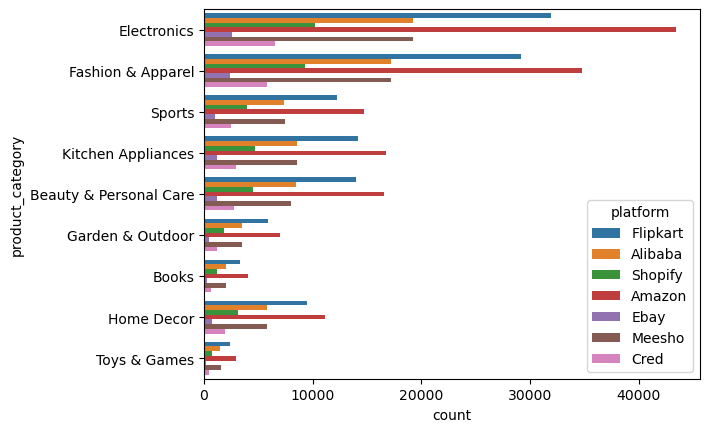

In [407]:
sns.countplot(data=df_transactions, y=df_transactions['product_category'], hue=df_transactions['platform'])

**Inference:**
- Amazon leads across almost all product categories.

In [409]:
#replacing the null values with the most used platform

df_transactions['platform'].mode()[0]

'Amazon'

In [410]:
df_transactions['platform'].fillna(df_transactions['platform'].mode()[0],inplace=True)

In [411]:
df_transactions.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

**Inference:**
- No null values in the `Transaction` table.

In [417]:
#Checking outliers

df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [419]:
zero_tran=df_transactions[df_transactions.tran_amount==0]
zero_tran

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [421]:
zero_tran[['platform','product_category','payment_type']].nunique()

platform            1
product_category    1
payment_type        1
dtype: int64

In [423]:
#Replacing outlier with mean value

tran1=df_transactions[(df_transactions['platform']=='Amazon')&(df_transactions['product_category']=='Electronics')&(df_transactions['payment_type']=='Credit Card')&(df_transactions['tran_amount']>1)]
median_rep=tran1['tran_amount'].median()
median_rep

554.0

In [425]:
df_transactions['tran_amount'].replace(0,median_rep,inplace=True)

In [427]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


**Inference:**
  
- Replaced 0 values with the median value based on similar platform,product catgeory and payment type

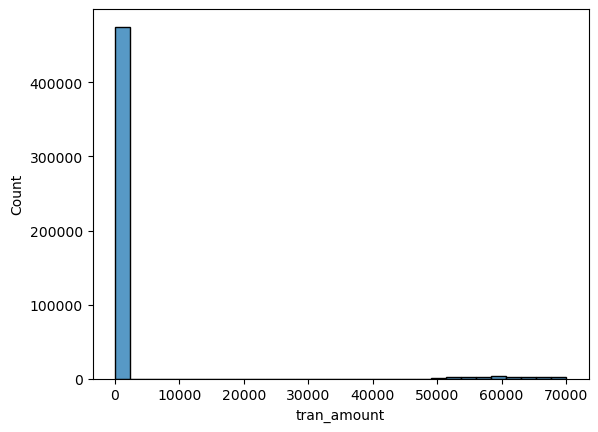

In [430]:
sns.histplot(df_transactions['tran_amount'],bins=30)
plt.show()

**Inference:**

- The distribution is highly right-skewed (positively skewed).
- A very large concentration of transactions lies near 0, indicating low-value transactions.
- A small number of transactions have extremely high values indicating outliers.

In [433]:
#Using IQR to find outliers

q1,q3 = df_transactions['tran_amount'].quantile([0.25,0.75])
IQR = q3-q1

lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR
print(lower_limit,upper_limit)

-454.5 933.5


In [435]:
df_tran_outlier = df_transactions[(df_transactions['tran_amount']<0)|(df_transactions['tran_amount']>upper_limit)]
df_tran_outlier

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
19,20,70,2023-01-01,945,Meesho,Electronics,Phonepe
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
48,49,532,2023-01-01,974,Flipkart,Electronics,Debit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499921,499922,492,2023-09-05,940,Amazon,Electronics,Gpay
499930,499931,365,2023-09-05,983,Alibaba,Electronics,Net Banking
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay
499993,499994,820,2023-09-05,950,Meesho,Electronics,Gpay


In [437]:
df_tran_normal=df_transactions[(df_transactions['tran_amount']>0)&(df_transactions['tran_amount']<upper_limit)]
df_tran_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [453]:
mean_df=df_tran_normal.groupby('product_category')['tran_amount'].mean()
mean_df

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               478.776125
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [451]:
df_transactions.loc[df_tran_outlier.index,'tran_amount']=df_tran_outlier['product_category'].map(mean_df)

In [455]:
df_transactions.loc[df_tran_outlier.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
19,20,70,2023-01-01,478.776125,Meesho,Electronics,Phonepe
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
48,49,532,2023-01-01,478.776125,Flipkart,Electronics,Debit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499921,499922,492,2023-09-05,478.776125,Amazon,Electronics,Gpay
499930,499931,365,2023-09-05,478.776125,Alibaba,Electronics,Net Banking
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay
499993,499994,820,2023-09-05,478.776125,Meesho,Electronics,Gpay


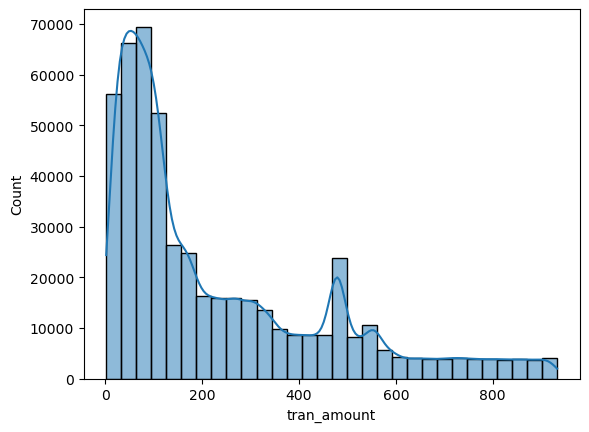

In [468]:
sns.histplot(df_transactions['tran_amount'],bins=30,kde=True)
plt.show()

**Inference:**

- Using the IQR method, lower and upper bounds were identified to detect outliers.
- Outliers were then replaced with the mean transaction value corresponding to their product category.
- The distribution is still right-skewed, but significantly more controlled compared to the raw data.
- The smoothing of extreme spikes indicates that outliers have been successfully treated, improving the stability of the distribution.

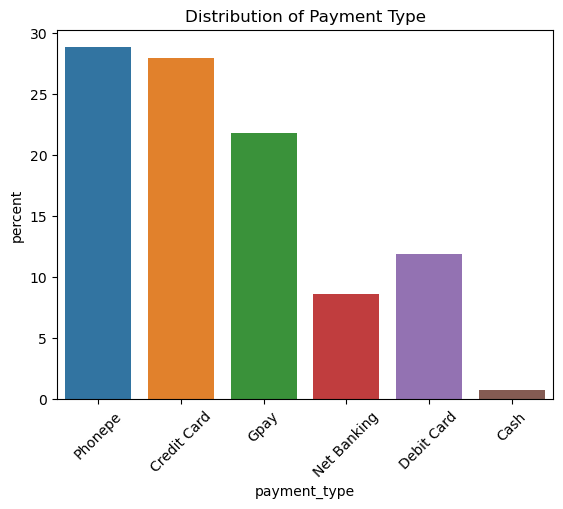

In [488]:
#Distribution of Payment Type

sns.countplot(x=df_transactions['payment_type'],stat='percent',palette='tab10')
plt.title("Distribution of Payment Type")
plt.xticks(rotation=45)
plt.show()

In [494]:
#Distribution of Payment Type Across Age Group

df_merged2 = pd.merge(df_merged,df_transactions,on="cust_id",how="inner")
df_merged2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_category,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


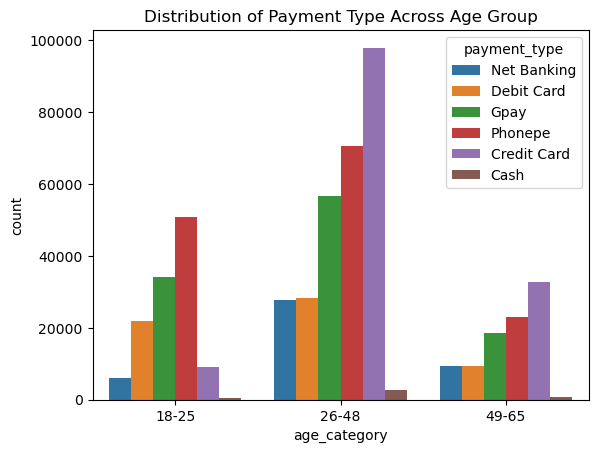

In [498]:
sns.countplot(data=df_merged2,x="age_category",hue="payment_type",palette="tab10")
plt.title("Distribution of Payment Type Across Age Group")
plt.show()

**Inference:**

- PhonePe is the most commonly used payment method among the 18–25 age group,indicating higher adoption of digital wallets among younger customers.
- Credit Cards dominate as the preferred payment method for both the 26–48 and 49–65 age groups,reflecting higher spending power and credit usage in these age groups.
- Cash is the least preferred mode of payment across all age groups.

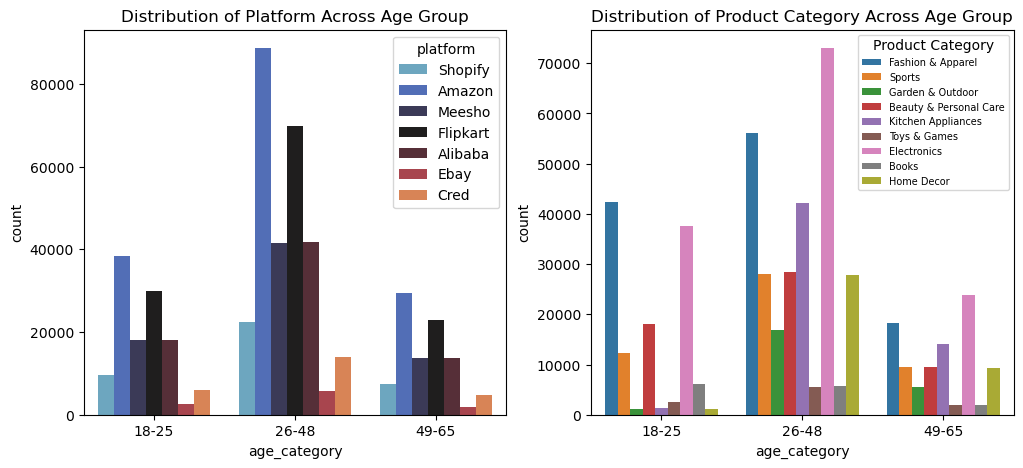

In [532]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=df_merged2,x="age_category",hue="platform",palette="icefire",ax=ax1)
ax1.set_title("Distribution of Platform Across Age Group")

sns.countplot(data=df_merged2,x="age_category",hue="product_category",palette="tab10",ax=ax2)
ax2.set_title("Distribution of Product Category Across Age Group")
ax2.legend(title="Product Category",fontsize='7')
plt.show()


**Inference:**
  
- Amazon is the most dominant platform across all age groups, with particularly strong usage in the 26–48 segment, indicating high trust and frequent usage among working-age consumers.
- Flipkart also shows strong adoption, especially within the 26–48 age group, making it the second most preferred platform overall.
- Meesho, Alibaba, Shopify and Ebay show relatively lower usage across all age groups.
- Cred has the lowest adoption overall, though slightly higher engagement is observed among the 26–48 age group, possibly due to its credit-focused user base.
- 26–48 age group shows the highest purchasing activity across all product categories, making it the most commercially active segment.
- Electronics dominate across all age groups, with especially strong demand among the 26–48 segment, indicating high spending power and tech adoption.
- Fashion & Apparel is the second most popular category, particularly among the 18–25 and 26–48 groups, reflecting lifestyle-driven purchases.


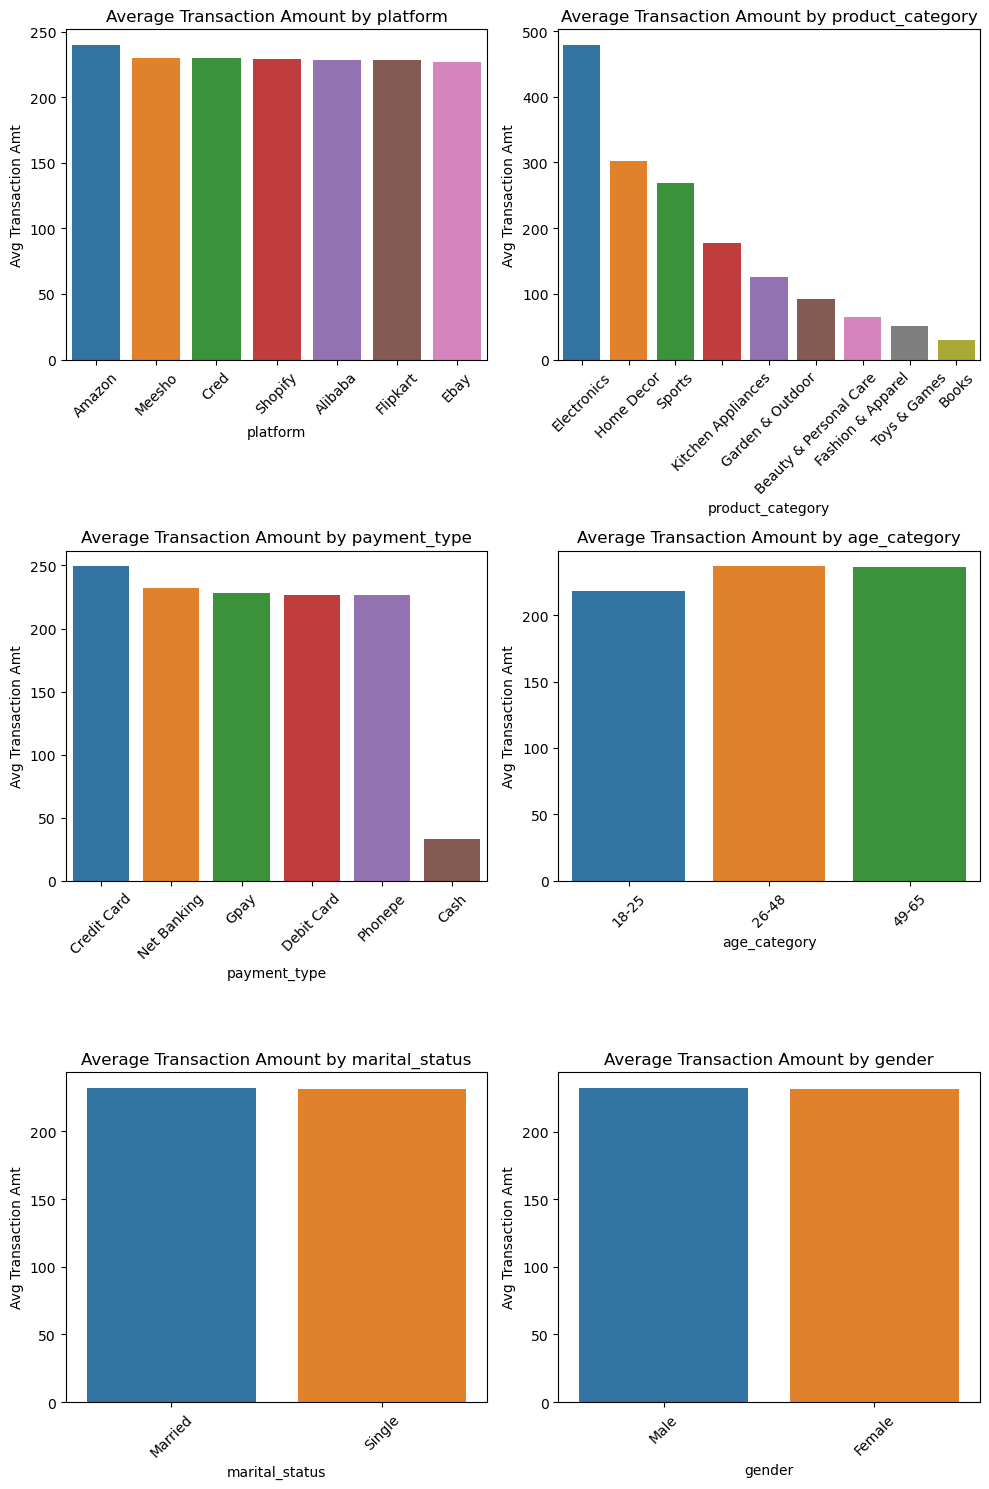

In [581]:
#Average Transaction Amount by Platform, Payment type, Product category, Age group, Gender & Marital Status

cols=['platform','product_category','payment_type','age_category','marital_status','gender']
fig,axes = plt.subplots(3,2,figsize=(10,15))
axes = axes.flatten()
for i,col in enumerate(cols):
    avg_tran_amt = df_merged2.groupby(col)['tran_amount'].mean().reset_index()
    sorted_amt = avg_tran_amt.sort_values(by="tran_amount",ascending=False)
    sns.barplot(data=sorted_amt, x=col, y='tran_amount',ax=axes[i],palette="tab10")
    axes[i].set_title(f"Average Transaction Amount by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Avg Transaction Amt")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


<h2>Further Analysis on Age Group</h2>

In [585]:
df_merged2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_category,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-750,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


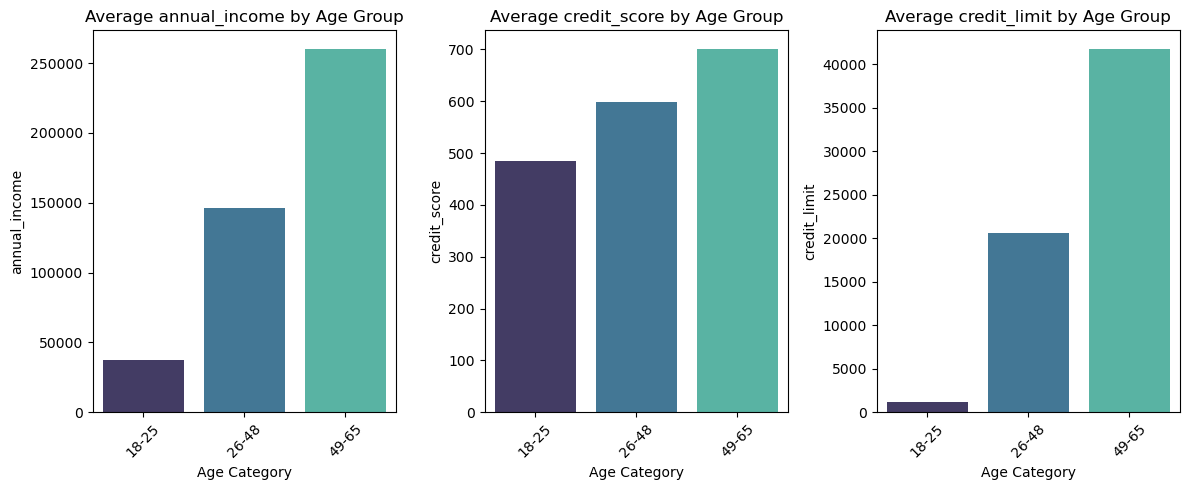

In [607]:
# avg annual income, credit limit, credit score

cols=['annual_income','credit_score','credit_limit']
fig,axes = plt.subplots(1,3,figsize=(12,5))
axes = axes.flatten()
for i,col in enumerate(cols):
    age_cat_wise = df_merged2.groupby('age_category')[col].mean().reset_index()
    sorted_age = age_cat_wise.sort_values(by="age_category",ascending=False,)
    sns.barplot(data=sorted_age, x='age_category', y=col, ax=axes[i],palette="mako")
    axes[i].set_title(f"Average {col} by Age Group")
    axes[i].set_xlabel("Age Category")
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()